In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
asansol_meteo = pd.read_csv('/kaggle/input/west-bengal-aqi/West Bengal/Metrological Data/Asansol.csv', skiprows = 2, delimiter=',')
asansol_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,12.1,97,0.0,1003.2,6.6,14.8,331,319
1,2024-01-01T01:00,12.0,98,0.0,1004.2,6.4,12.8,328,313
2,2024-01-01T02:00,13.8,93,0.0,1005.0,7.1,12.9,324,315
3,2024-01-01T03:00,15.9,85,0.0,1005.6,6.9,10.5,322,321
4,2024-01-01T04:00,18.3,76,0.0,1005.7,8.0,10.6,325,324
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.8,80,0.0,1003.6,12.4,23.9,324,321
8780,2024-12-31T20:00,14.2,83,0.0,1002.8,13.0,24.7,325,322
8781,2024-12-31T21:00,13.6,86,0.0,1002.2,13.3,25.2,325,322
8782,2024-12-31T22:00,13.2,89,0.0,1001.6,12.1,23.4,321,318


In [3]:
asansol_pollutants = pd.read_csv('/kaggle/input/west-bengal-aqi/West Bengal/Pollutants/Asansol.csv', delimiter= ',')
asansol_pollutants['Timestamp'] = asansol_meteo['time']
asansol_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
asansol_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,63.35,124.08,9.62,30.40,23.58,27.43,6.18,0.64,23.74,...,5.58,15.41,99.30,0.98,10.86,0.0,0.0,8.95,1016.42,0.41
1,2024-01-01T01:00,60.48,115.44,9.10,26.68,21.23,26.98,5.93,0.60,26.26,...,4.39,15.02,99.33,1.14,262.42,0.0,0.0,9.38,1016.40,0.42
2,2024-01-01T02:00,53.29,105.75,9.54,24.84,20.61,23.40,6.94,0.26,25.78,...,2.35,14.67,99.33,1.19,348.68,0.0,0.0,9.05,1016.18,0.42
3,2024-01-01T03:00,54.96,98.56,8.82,26.68,21.00,23.95,8.35,0.42,22.32,...,2.13,13.78,99.35,1.37,12.57,0.0,0.0,8.93,1015.98,0.43
4,2024-01-01T04:00,53.65,98.89,8.82,23.55,19.38,25.72,6.96,0.70,24.98,...,1.11,13.69,99.36,1.12,264.71,0.0,0.0,9.48,1016.40,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,76.46,155.91,7.84,31.64,22.93,22.94,7.44,0.89,22.10,...,1.87,16.74,79.39,0.64,131.23,0.0,0.0,7.50,818.41,0.44
8780,2024-12-31T20:00,76.90,153.72,7.24,30.77,22.00,22.46,7.28,0.74,21.58,...,1.67,16.08,82.50,0.56,254.08,0.0,0.0,7.38,818.84,0.43
8781,2024-12-31T21:00,69.65,141.51,6.76,22.80,17.39,20.95,7.69,0.76,24.31,...,1.49,15.39,87.74,0.54,208.58,0.0,0.0,7.52,819.24,0.44
8782,2024-12-31T22:00,61.91,128.83,6.14,18.78,14.76,20.32,7.04,0.62,28.56,...,1.54,14.89,88.91,0.55,234.96,0.0,0.0,7.46,819.26,0.43


In [4]:
asansol= pd.merge(asansol_meteo.iloc[:, :], asansol_pollutants.iloc[:, 0:3], on='time')
asansol

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,12.1,97,0.0,1003.2,6.6,14.8,331,319,63.35,124.08
1,2024-01-01T01:00,12.0,98,0.0,1004.2,6.4,12.8,328,313,60.48,115.44
2,2024-01-01T02:00,13.8,93,0.0,1005.0,7.1,12.9,324,315,53.29,105.75
3,2024-01-01T03:00,15.9,85,0.0,1005.6,6.9,10.5,322,321,54.96,98.56
4,2024-01-01T04:00,18.3,76,0.0,1005.7,8.0,10.6,325,324,53.65,98.89
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.8,80,0.0,1003.6,12.4,23.9,324,321,76.46,155.91
8780,2024-12-31T20:00,14.2,83,0.0,1002.8,13.0,24.7,325,322,76.90,153.72
8781,2024-12-31T21:00,13.6,86,0.0,1002.2,13.3,25.2,325,322,69.65,141.51
8782,2024-12-31T22:00,13.2,89,0.0,1001.6,12.1,23.4,321,318,61.91,128.83


In [5]:
asansol['city'] = 'Asansol'
asansol

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,12.1,97,0.0,1003.2,6.6,14.8,331,319,63.35,124.08,Asansol
1,2024-01-01T01:00,12.0,98,0.0,1004.2,6.4,12.8,328,313,60.48,115.44,Asansol
2,2024-01-01T02:00,13.8,93,0.0,1005.0,7.1,12.9,324,315,53.29,105.75,Asansol
3,2024-01-01T03:00,15.9,85,0.0,1005.6,6.9,10.5,322,321,54.96,98.56,Asansol
4,2024-01-01T04:00,18.3,76,0.0,1005.7,8.0,10.6,325,324,53.65,98.89,Asansol
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.8,80,0.0,1003.6,12.4,23.9,324,321,76.46,155.91,Asansol
8780,2024-12-31T20:00,14.2,83,0.0,1002.8,13.0,24.7,325,322,76.90,153.72,Asansol
8781,2024-12-31T21:00,13.6,86,0.0,1002.2,13.3,25.2,325,322,69.65,141.51,Asansol
8782,2024-12-31T22:00,13.2,89,0.0,1001.6,12.1,23.4,321,318,61.91,128.83,Asansol


In [6]:
asansol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8734 non-null   float64
 10  PM10 (µg/m³)              8722 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
asansol = asansol.interpolate()
asansol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    asansol[delay1_col] = asansol[col].shift(1)
    delay2_col = col + "_delay2"
    asansol[delay2_col] = asansol[col].shift(2)
    asansol.loc[0, delay1_col] = asansol[col].iloc[-1]
    asansol.loc[1, delay2_col] = asansol[col].iloc[-1]
    asansol.loc[0, delay2_col] = asansol[col].iloc[-2]

asansol

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.1,97,0.0,1003.2,6.6,14.8,331,319,63.35,124.08,Asansol,60.65,61.91,118.69,128.83
1,2024-01-01T01:00,12.0,98,0.0,1004.2,6.4,12.8,328,313,60.48,115.44,Asansol,63.35,60.65,124.08,118.69
2,2024-01-01T02:00,13.8,93,0.0,1005.0,7.1,12.9,324,315,53.29,105.75,Asansol,60.48,63.35,115.44,124.08
3,2024-01-01T03:00,15.9,85,0.0,1005.6,6.9,10.5,322,321,54.96,98.56,Asansol,53.29,60.48,105.75,115.44
4,2024-01-01T04:00,18.3,76,0.0,1005.7,8.0,10.6,325,324,53.65,98.89,Asansol,54.96,53.29,98.56,105.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.8,80,0.0,1003.6,12.4,23.9,324,321,76.46,155.91,Asansol,63.63,45.66,132.77,100.96
8780,2024-12-31T20:00,14.2,83,0.0,1002.8,13.0,24.7,325,322,76.90,153.72,Asansol,76.46,63.63,155.91,132.77
8781,2024-12-31T21:00,13.6,86,0.0,1002.2,13.3,25.2,325,322,69.65,141.51,Asansol,76.90,76.46,153.72,155.91
8782,2024-12-31T22:00,13.2,89,0.0,1001.6,12.1,23.4,321,318,61.91,128.83,Asansol,69.65,76.90,141.51,153.72


In [9]:
siliguri_meteo = pd.read_csv('/kaggle/input/west-bengal-aqi/West Bengal/Metrological Data/Siliguri.csv', skiprows=2, delimiter=',')
siliguri_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,12.1,90,0.0,1001.0,9.5,9.8,278,245
1,2024-01-01T01:00,12.6,90,0.0,1002.1,7.9,6.9,279,240
2,2024-01-01T02:00,14.0,89,0.0,1002.8,7.4,9.7,270,247
3,2024-01-01T03:00,15.6,84,0.0,1003.7,5.6,10.1,268,243
4,2024-01-01T04:00,17.7,75,0.0,1004.1,3.9,5.9,256,248
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,96,0.0,1000.8,7.7,14.2,258,237
8780,2024-12-31T20:00,13.8,97,0.0,999.9,6.6,13.3,261,237
8781,2024-12-31T21:00,13.5,97,0.0,999.2,6.2,12.9,262,237
8782,2024-12-31T22:00,13.1,98,0.0,998.9,5.4,12.3,262,236


In [10]:
siliguri_pollutants = pd.read_csv('/kaggle/input/west-bengal-aqi/West Bengal/Pollutants/Siliguri.csv', delimiter= ',')
siliguri_pollutants['Timestamp'] = siliguri_meteo['time']
siliguri_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
siliguri_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,68.04,136.44,25.68,37.47,40.42,46.63,6.64,1.11,7.45,...,1.48,NaN,97.63,1.07,231.35,0.0,0.0,20.62,1005.85,-0.25
1,2024-01-01T01:00,62.89,122.59,11.10,32.64,26.20,49.66,6.76,1.21,7.35,...,1.48,NaN,97.62,1.06,231.32,0.0,0.0,20.00,1005.72,-0.25
2,2024-01-01T02:00,54.68,101.18,25.09,33.56,37.91,45.50,6.95,1.10,7.74,...,1.40,NaN,97.59,1.04,219.49,0.0,0.0,19.20,1005.60,-0.24
3,2024-01-01T03:00,46.67,84.80,16.19,30.06,28.94,55.40,6.24,0.95,7.65,...,1.42,NaN,97.60,1.03,239.73,0.0,0.0,20.38,1005.72,-0.24
4,2024-01-01T04:00,45.55,74.23,10.19,28.27,23.20,51.98,6.02,0.83,8.39,...,1.16,NaN,97.63,0.72,243.17,0.0,0.0,20.75,1006.15,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,87.37,158.32,14.34,20.66,22.47,47.69,8.79,1.11,18.98,...,4.91,15.32,97.55,0.90,235.68,0.0,0.0,19.77,1005.50,-0.32
8780,2024-12-31T20:00,104.44,177.90,14.26,20.98,22.57,47.04,9.29,1.42,16.50,...,4.53,14.62,97.70,0.60,253.70,0.0,0.0,18.55,1005.88,-0.32
8781,2024-12-31T21:00,120.77,187.20,13.88,20.34,21.93,45.87,9.72,1.46,16.04,...,3.94,14.34,97.78,0.75,252.68,0.0,0.0,17.92,1006.02,-0.32
8782,2024-12-31T22:00,120.53,196.62,15.65,21.69,24.06,47.84,8.96,1.69,15.27,...,6.49,13.96,97.76,1.18,226.71,0.0,0.0,18.08,1005.90,-0.32


In [11]:
siliguri = pd.merge(siliguri_meteo.iloc[:, :], siliguri_pollutants.iloc[:, 0:3], on='time')
siliguri

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,12.1,90,0.0,1001.0,9.5,9.8,278,245,68.04,136.44
1,2024-01-01T01:00,12.6,90,0.0,1002.1,7.9,6.9,279,240,62.89,122.59
2,2024-01-01T02:00,14.0,89,0.0,1002.8,7.4,9.7,270,247,54.68,101.18
3,2024-01-01T03:00,15.6,84,0.0,1003.7,5.6,10.1,268,243,46.67,84.80
4,2024-01-01T04:00,17.7,75,0.0,1004.1,3.9,5.9,256,248,45.55,74.23
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,96,0.0,1000.8,7.7,14.2,258,237,87.37,158.32
8780,2024-12-31T20:00,13.8,97,0.0,999.9,6.6,13.3,261,237,104.44,177.90
8781,2024-12-31T21:00,13.5,97,0.0,999.2,6.2,12.9,262,237,120.77,187.20
8782,2024-12-31T22:00,13.1,98,0.0,998.9,5.4,12.3,262,236,120.53,196.62


In [12]:
siliguri['city'] = 'Siliguri'
siliguri

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,12.1,90,0.0,1001.0,9.5,9.8,278,245,68.04,136.44,Siliguri
1,2024-01-01T01:00,12.6,90,0.0,1002.1,7.9,6.9,279,240,62.89,122.59,Siliguri
2,2024-01-01T02:00,14.0,89,0.0,1002.8,7.4,9.7,270,247,54.68,101.18,Siliguri
3,2024-01-01T03:00,15.6,84,0.0,1003.7,5.6,10.1,268,243,46.67,84.80,Siliguri
4,2024-01-01T04:00,17.7,75,0.0,1004.1,3.9,5.9,256,248,45.55,74.23,Siliguri
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,96,0.0,1000.8,7.7,14.2,258,237,87.37,158.32,Siliguri
8780,2024-12-31T20:00,13.8,97,0.0,999.9,6.6,13.3,261,237,104.44,177.90,Siliguri
8781,2024-12-31T21:00,13.5,97,0.0,999.2,6.2,12.9,262,237,120.77,187.20,Siliguri
8782,2024-12-31T22:00,13.1,98,0.0,998.9,5.4,12.3,262,236,120.53,196.62,Siliguri


In [13]:
siliguri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8462 non-null   float64
 10  PM10 (µg/m³)              8534 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
siliguri = siliguri.interpolate()
siliguri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    siliguri[delay1_col] = siliguri[col].shift(1)
    delay2_col = col + "_delay2"
    siliguri[delay2_col] = siliguri[col].shift(2)
    siliguri.loc[0, delay1_col] = siliguri[col].iloc[-1]
    siliguri.loc[1, delay2_col] = siliguri[col].iloc[-1]
    siliguri.loc[0, delay2_col] = siliguri[col].iloc[-2]

siliguri

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.1,90,0.0,1001.0,9.5,9.8,278,245,68.04,136.44,Siliguri,124.91,120.53,203.74,196.62
1,2024-01-01T01:00,12.6,90,0.0,1002.1,7.9,6.9,279,240,62.89,122.59,Siliguri,68.04,124.91,136.44,203.74
2,2024-01-01T02:00,14.0,89,0.0,1002.8,7.4,9.7,270,247,54.68,101.18,Siliguri,62.89,68.04,122.59,136.44
3,2024-01-01T03:00,15.6,84,0.0,1003.7,5.6,10.1,268,243,46.67,84.80,Siliguri,54.68,62.89,101.18,122.59
4,2024-01-01T04:00,17.7,75,0.0,1004.1,3.9,5.9,256,248,45.55,74.23,Siliguri,46.67,54.68,84.80,101.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,96,0.0,1000.8,7.7,14.2,258,237,87.37,158.32,Siliguri,72.32,64.17,137.57,127.99
8780,2024-12-31T20:00,13.8,97,0.0,999.9,6.6,13.3,261,237,104.44,177.90,Siliguri,87.37,72.32,158.32,137.57
8781,2024-12-31T21:00,13.5,97,0.0,999.2,6.2,12.9,262,237,120.77,187.20,Siliguri,104.44,87.37,177.90,158.32
8782,2024-12-31T22:00,13.1,98,0.0,998.9,5.4,12.3,262,236,120.53,196.62,Siliguri,120.77,104.44,187.20,177.90


In [16]:
kolkata_meteo = pd.read_csv('/kaggle/input/west-bengal-aqi/West Bengal/Metrological Data/Kolkata.csv', skiprows=2, delimiter=',')
kolkata_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,14.7,96,0.0,1015.2,6.8,18.5,8,360
1,2024-01-01T01:00,14.6,97,0.0,1016.4,6.8,18.2,9,360
2,2024-01-01T02:00,15.9,93,0.0,1016.9,9.7,18.8,7,356
3,2024-01-01T03:00,17.8,86,0.0,1017.3,9.4,14.0,360,356
4,2024-01-01T04:00,20.1,76,0.0,1017.3,9.4,12.6,357,353
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.0,73,0.0,1015.1,8.2,19.1,344,337
8780,2024-12-31T20:00,16.2,75,0.0,1014.6,9.3,20.7,343,335
8781,2024-12-31T21:00,15.7,77,0.0,1014.0,8.3,19.0,347,340
8782,2024-12-31T22:00,15.2,80,0.0,1013.8,7.8,18.1,343,334


In [17]:
kolkata_pollutants = pd.read_csv('/kaggle/input/west-bengal-aqi/West Bengal/Pollutants/Kolkata.csv', delimiter= ',')
kolkata_pollutants['Timestamp'] = kolkata_meteo['time']
kolkata_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
kolkata_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,85.26,178.20,15.87,29.50,28.23,30.07,7.77,1.21,11.67,...,2.58,17.89,97.64,0.34,230.00,0.0,0.0,19.50,1011.24,0.19
1,2024-01-01T01:00,88.12,178.06,12.82,24.00,22.91,28.94,7.63,1.04,13.49,...,2.52,18.00,97.61,0.53,184.43,0.0,0.0,19.86,1011.11,0.17
2,2024-01-01T02:00,89.12,174.97,8.67,17.58,16.24,28.34,7.33,0.93,17.38,...,2.25,17.68,97.01,0.90,118.72,0.0,0.0,18.44,1010.98,0.16
3,2024-01-01T03:00,81.28,163.89,8.14,16.25,15.10,28.67,7.55,0.88,19.57,...,2.19,17.05,96.18,0.90,115.87,0.0,0.0,18.21,1011.04,0.15
4,2024-01-01T04:00,76.15,153.11,8.47,13.97,14.19,27.45,7.25,0.85,19.75,...,1.84,16.63,96.10,0.90,112.67,0.0,0.0,18.48,1011.46,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,60.10,139.89,12.44,42.49,32.08,25.38,11.69,0.83,27.25,...,1.65,20.42,67.27,0.89,268.64,0.0,0.0,65.66,1012.99,0.06
8780,2024-12-31T20:00,61.76,147.07,11.33,40.29,30.06,26.39,8.80,0.79,26.36,...,1.28,20.00,67.47,0.79,160.05,0.0,0.0,64.04,1013.41,0.12
8781,2024-12-31T21:00,63.11,149.15,11.55,42.43,31.23,26.82,6.90,0.81,20.93,...,1.14,19.17,71.62,0.56,177.84,0.0,0.0,54.43,1013.66,0.10
8782,2024-12-31T22:00,65.07,146.73,12.58,45.92,34.00,28.28,6.99,0.89,18.07,...,1.07,18.90,73.38,0.82,172.97,0.0,0.0,52.89,1013.46,0.06


In [18]:
kolkata = pd.merge(kolkata_meteo.iloc[:, :], kolkata_pollutants.iloc[:, 0:3], on='time')
kolkata

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,14.7,96,0.0,1015.2,6.8,18.5,8,360,85.26,178.20
1,2024-01-01T01:00,14.6,97,0.0,1016.4,6.8,18.2,9,360,88.12,178.06
2,2024-01-01T02:00,15.9,93,0.0,1016.9,9.7,18.8,7,356,89.12,174.97
3,2024-01-01T03:00,17.8,86,0.0,1017.3,9.4,14.0,360,356,81.28,163.89
4,2024-01-01T04:00,20.1,76,0.0,1017.3,9.4,12.6,357,353,76.15,153.11
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.0,73,0.0,1015.1,8.2,19.1,344,337,60.10,139.89
8780,2024-12-31T20:00,16.2,75,0.0,1014.6,9.3,20.7,343,335,61.76,147.07
8781,2024-12-31T21:00,15.7,77,0.0,1014.0,8.3,19.0,347,340,63.11,149.15
8782,2024-12-31T22:00,15.2,80,0.0,1013.8,7.8,18.1,343,334,65.07,146.73


In [19]:
kolkata['city'] = 'Kolkata'
kolkata

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,14.7,96,0.0,1015.2,6.8,18.5,8,360,85.26,178.20,Kolkata
1,2024-01-01T01:00,14.6,97,0.0,1016.4,6.8,18.2,9,360,88.12,178.06,Kolkata
2,2024-01-01T02:00,15.9,93,0.0,1016.9,9.7,18.8,7,356,89.12,174.97,Kolkata
3,2024-01-01T03:00,17.8,86,0.0,1017.3,9.4,14.0,360,356,81.28,163.89,Kolkata
4,2024-01-01T04:00,20.1,76,0.0,1017.3,9.4,12.6,357,353,76.15,153.11,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.0,73,0.0,1015.1,8.2,19.1,344,337,60.10,139.89,Kolkata
8780,2024-12-31T20:00,16.2,75,0.0,1014.6,9.3,20.7,343,335,61.76,147.07,Kolkata
8781,2024-12-31T21:00,15.7,77,0.0,1014.0,8.3,19.0,347,340,63.11,149.15,Kolkata
8782,2024-12-31T22:00,15.2,80,0.0,1013.8,7.8,18.1,343,334,65.07,146.73,Kolkata


In [20]:
kolkata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    kolkata[delay1_col] = kolkata[col].shift(1)
    delay2_col = col + "_delay2"
    kolkata[delay2_col] = kolkata[col].shift(2)
    kolkata.loc[0, delay1_col] = kolkata[col].iloc[-1]
    kolkata.loc[1, delay2_col] = kolkata[col].iloc[-1]
    kolkata.loc[0, delay2_col] = kolkata[col].iloc[-2]

kolkata

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.7,96,0.0,1015.2,6.8,18.5,8,360,85.26,178.20,Kolkata,65.14,65.07,147.45,146.73
1,2024-01-01T01:00,14.6,97,0.0,1016.4,6.8,18.2,9,360,88.12,178.06,Kolkata,85.26,65.14,178.20,147.45
2,2024-01-01T02:00,15.9,93,0.0,1016.9,9.7,18.8,7,356,89.12,174.97,Kolkata,88.12,85.26,178.06,178.20
3,2024-01-01T03:00,17.8,86,0.0,1017.3,9.4,14.0,360,356,81.28,163.89,Kolkata,89.12,88.12,174.97,178.06
4,2024-01-01T04:00,20.1,76,0.0,1017.3,9.4,12.6,357,353,76.15,153.11,Kolkata,81.28,89.12,163.89,174.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.0,73,0.0,1015.1,8.2,19.1,344,337,60.10,139.89,Kolkata,50.44,47.44,122.36,114.37
8780,2024-12-31T20:00,16.2,75,0.0,1014.6,9.3,20.7,343,335,61.76,147.07,Kolkata,60.10,50.44,139.89,122.36
8781,2024-12-31T21:00,15.7,77,0.0,1014.0,8.3,19.0,347,340,63.11,149.15,Kolkata,61.76,60.10,147.07,139.89
8782,2024-12-31T22:00,15.2,80,0.0,1013.8,7.8,18.1,343,334,65.07,146.73,Kolkata,63.11,61.76,149.15,147.07


In [22]:
westbengal_data = pd.concat([asansol, kolkata, siliguri], axis=0, ignore_index=True)
westbengal_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.1,97,0.0,1003.2,6.6,14.8,331,319,63.35,124.08,Asansol,60.65,61.91,118.69,128.83
1,2024-01-01T01:00,12.0,98,0.0,1004.2,6.4,12.8,328,313,60.48,115.44,Asansol,63.35,60.65,124.08,118.69
2,2024-01-01T02:00,13.8,93,0.0,1005.0,7.1,12.9,324,315,53.29,105.75,Asansol,60.48,63.35,115.44,124.08
3,2024-01-01T03:00,15.9,85,0.0,1005.6,6.9,10.5,322,321,54.96,98.56,Asansol,53.29,60.48,105.75,115.44
4,2024-01-01T04:00,18.3,76,0.0,1005.7,8.0,10.6,325,324,53.65,98.89,Asansol,54.96,53.29,98.56,105.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26347,2024-12-31T19:00,14.2,96,0.0,1000.8,7.7,14.2,258,237,87.37,158.32,Siliguri,72.32,64.17,137.57,127.99
26348,2024-12-31T20:00,13.8,97,0.0,999.9,6.6,13.3,261,237,104.44,177.90,Siliguri,87.37,72.32,158.32,137.57
26349,2024-12-31T21:00,13.5,97,0.0,999.2,6.2,12.9,262,237,120.77,187.20,Siliguri,104.44,87.37,177.90,158.32
26350,2024-12-31T22:00,13.1,98,0.0,998.9,5.4,12.3,262,236,120.53,196.62,Siliguri,120.77,104.44,187.20,177.90


In [23]:
westbengal_data['city'] = westbengal_data['city'].astype('category')

In [24]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [25]:
X, y = westbengal_data[input_cols], westbengal_data[target_cols]

In [26]:
from xgboost import XGBRegressor

In [27]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [28]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
pred_check = model.predict(X)

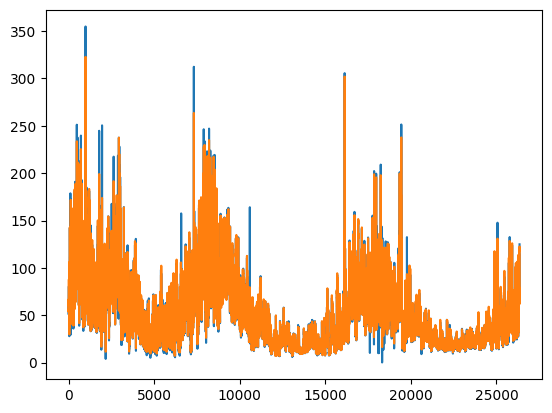

In [30]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [31]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9817456996868245


In [32]:
import joblib
joblib.dump(model, 'WestBengal_PM25.pkl')

['WestBengal_PM25.pkl']

In [33]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
pred_check2 = model.predict(X)

In [35]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9777302227860771


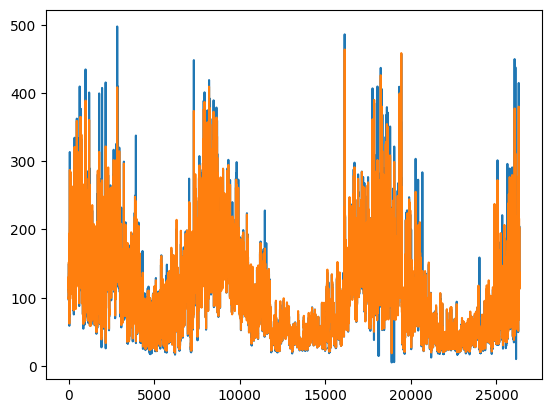

In [36]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [37]:
joblib.dump(model, 'WestBengal_PM10.pkl')

['WestBengal_PM10.pkl']